# Problem 3 Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load MNIST data into Keras format
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# we'll need to one-hot encode the labels
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

# don't forget to NORMALIZE
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

# we must reshape the X data (add a channel dimension)
x_train = x_train.reshape(tuple(list(x_train.shape) + [1]))
x_test = x_test.reshape(tuple(list(x_test.shape) + [1]))

## 3D: Final model

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras import regularizers

# sample model
# note: what is the difference between 'same' and 'valid' padding?
# Take a look at the outputs to understand the difference, or read the Keras documentation!
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
# our model has some # of parameters:
model.count_params()

239498

In [6]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.1857 - acc: 0.9492 - val_loss: 0.0662 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0626 - acc: 0.9812 - val_loss: 0.0431 - val_acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0477 - acc: 0.9862 - val_loss: 0.0369 - val_acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0396 - acc: 0.9885 - val_loss: 0.0439 - val_acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0353 - acc: 0.9902 - val_loss: 0.0370 - val_acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0293 - acc: 0.9912 - val_loss: 0.0315 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0275 - acc: 0.9922 - val_loss: 0.

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


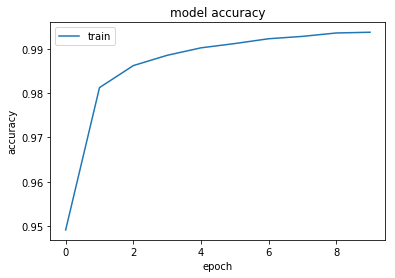

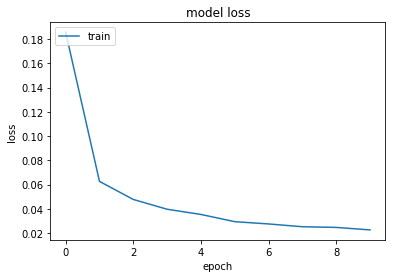

In [7]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
# plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
from keras import backend as K

K.clear_session()

## 3D: Varying dropout probabilities

In [19]:
ps = np.arange(0, 1., 0.1)

In [20]:
def run_model_with_p(p):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same',
                     input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(p))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(p))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model, iterating on the data in batches of 32 samples
    history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                        validation_data=(x_test, y_test),
                        verbose=0)
    
    # Final evaluation of test loss
    loss = model.evaluate(x=x_test, y=y_test)[1]
    
    # clear memory for next session
    K.clear_session()
    
    return loss

In [21]:
losses = []
for p in ps:
    losses.append(run_model_with_p(p))

10000/10000 [==============================] - 1s 74us/step


In [26]:
print(losses)

[0.99309999999999998, 0.99139999999999995, 0.99250000000000005, 0.99060000000000004, 0.98870000000000002, 0.98999999999999999, 0.98950000000000005, 0.98640000000000005, 0.98170000000000002, 0.96189999999999998]


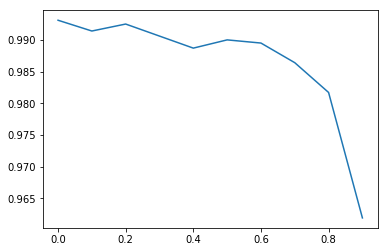

In [24]:
plt.plot(ps, losses)